
# Analisa Pola Konsumsi Obat Berdasarkan Skor Psikologis Individu
Nama: Edsel Rivenda Saputra <br />
NIM: A11.2022.14305 <br />
Kelompok: A11.4517 

**Ringkasan:**
Proyek ini bertujuan untuk menganalisis hubungan antara skor psikologis individu dengan pola konsumsi obat tertentu. Konsumsi obat memiliki relevansi besar terhadap kesehatan masyarakat, terutama dalam memahami faktor-faktor yang memengaruhi pola penggunaan obat secara berlebihan atau sesuai kebutuhan.

**Permasalahan:**
Apa faktor psikologis yang memengaruhi konsumsi obat tertentu? Bagaimana kita dapat memprediksi kemungkinan konsumsi berdasarkan skor psikologis seseorang?

**Tujuan:**
1. Menganalisis pola konsumsi obat berdasarkan skor psikologis individu.
2. Membangun model prediktif untuk menentukan konsumsi obat berdasarkan faktor psikologis.

**Alur Penyelesaian:**
1. **Data Understanding:** Analisis deskriptif dan eksplorasi dataset.
2. **Preprocessing:** Mengolah dataset menjadi format yang siap digunakan untuk modeling.
3. **Modeling:** Melatih model pembelajaran mesin untuk memprediksi konsumsi obat.
4. **Evaluasi:** Menilai performa model menggunakan metrik akurasi, confusion matrix, dan cross-validation.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

Berikut adalah beberapa library yang digunakan jika ingin menjalankan kode ini di perangkat anda silahkan baca README di repository


**Dataset:**
Dataset ini berisi informasi tentang konsumsi berbagai obat serta skor psikologis pengguna.
- **Fitur Psikologis:** Skor pada dimensi kepribadian, seperti Nscore, Escore, dan sebagainya.
- **Target:** Pola konsumsi obat (digunakan sebagai klasifikasi biner untuk model).

**EDA:**
Distribusi data akan divisualisasikan untuk memahami pola dalam dataset, termasuk:
1. Distribusi nilai skor psikologis.
2. Korelasi antara fitur psikologis dan pola konsumsi obat.

**Proses Feature Engineering:**
1. Memetakan nilai konsumsi obat ke dalam angka.
2. Menyederhanakan target menjadi klasifikasi biner untuk mempermudah analisis dan prediksi.


In [19]:
data = pd.read_csv('dataset/drug_consumption.csv')

Kali ini saya hanya menggunakan narkotika yang bernama Cannabis atau lebih tepatnya daun Ganja sebagai bahan eksperimen

In [20]:
psychological_scores = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
drug_column = 'Cannabis'


Berikut adalah beberapa metrik yang digunakan dalam psychological_scores:

1. **Nscore** -> Neuroticism: Individu yang mendapat skor tinggi cenderung lebih mudah berubah suasana hati dan mengalami perasaan seperti cemas, khawatir, takut, marah, frustrasi, iri hati, cemburu, bersalah, suasana hati tertekan, dan kesepian.

2. **EScore** -> Ekstroversi: Menunjukkan seberapa supel dan sosialnya seseorang. Seseorang yang mendapat skor tinggi senang berada di antara orang lain, berpartisipasi dalam pertemuan sosial.

3. **Oscore** -> Keterbukaan terhadap pengalaman: Menunjukkan seberapa berpikiran terbuka seseorang. Seseorang dengan tingkat tinggi senang mencoba hal-hal baru. Mereka imajinatif, ingin tahu, dan berpikiran terbuka. Individu yang rendah dalam keterbukaan terhadap pengalaman lebih suka tidak mencoba hal-hal baru.

4. **Ascore** -> Keramahan: Seseorang dengan tingkat keramahtamahan yang tinggi biasanya hangat, ramah, dan bijaksana. Mereka umumnya memiliki pandangan optimis tentang sifat manusia dan rukun dengan orang lain.

5. **Cscore** -> Kehati-hatian: Seseorang yang mendapat skor tinggi dalam kehati-hatian biasanya memiliki tingkat disiplin diri yang tinggi. Individu-individu ini lebih suka mengikuti rencana, daripada bertindak secara spontan. Perencanaan metodis dan ketekunan mereka biasanya membuat mereka sangat sukses dalam pekerjaan yang dipilihnya.

6. **Impulsif** -> Impulsif: Kecenderungan untuk bertindak berdasarkan keinginan, menunjukkan perilaku yang ditandai dengan sedikit atau tidak adanya pemikiran, refleksi, atau pertimbangan tentang konsekuensinya.

7. **SS** -> Sensasi: Merupakan masukan tentang dunia fisik yang diperoleh oleh reseptor sensorik kita, dan persepsi adalah proses di mana otak memilih, mengatur, dan menafsirkan sensasi ini. Dengan kata lain, indra adalah dasar fisiologis persepsi.


In [21]:
selected_columns = psychological_scores + [drug_column]
df_selected = data[selected_columns]


## Preprocessing Data dan Rekayasa Fitur
Kita menyederhanakan kolom konsumsi obat menjadi target biner dan menangani ketidakseimbangan kelas.


In [22]:
# Convert the drug usage column from categorical to numerical for classification
def map_drug_usage(value):
    # Map drug usage levels to numerical values
    usage_mapping = {'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6}
    return usage_mapping.get(value, None)

df_selected[drug_column] = df_selected[drug_column].apply(map_drug_usage)

C:\Users\HP\AppData\Local\Temp\ipykernel_9072\316914671.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[drug_column] = df_selected[drug_column].apply(map_drug_usage)


In [23]:
# Remove rows with null values resulting from the mapping
df_selected = df_selected.dropna()

In [24]:
df_selected['Cannabis_Binary'] = df_selected[drug_column].apply(lambda x: 1 if x > 0 else 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_9072\2895825294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=drug_column, data=df_selected, palette='viridis')


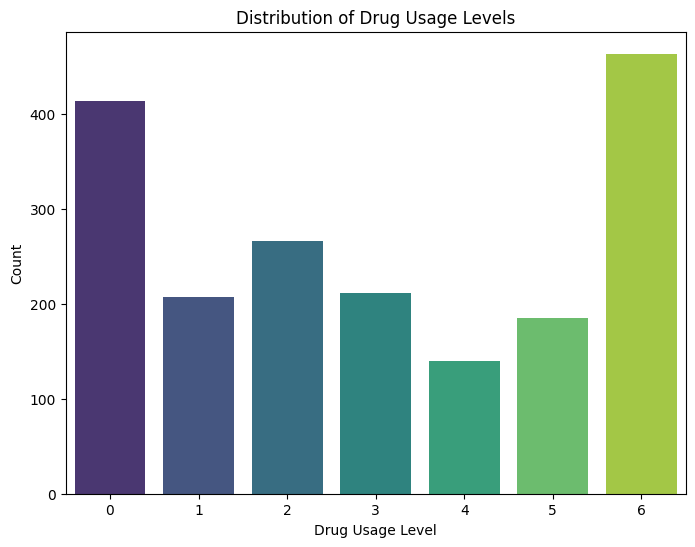

In [25]:
# EDA
# Visualize the distribution of drug usage levels
plt.figure(figsize=(8, 6))
sns.countplot(x=drug_column, data=df_selected, palette='viridis')
plt.title('Distribution of Drug Usage Levels')
plt.xlabel('Drug Usage Level')
plt.ylabel('Count')
plt.show()

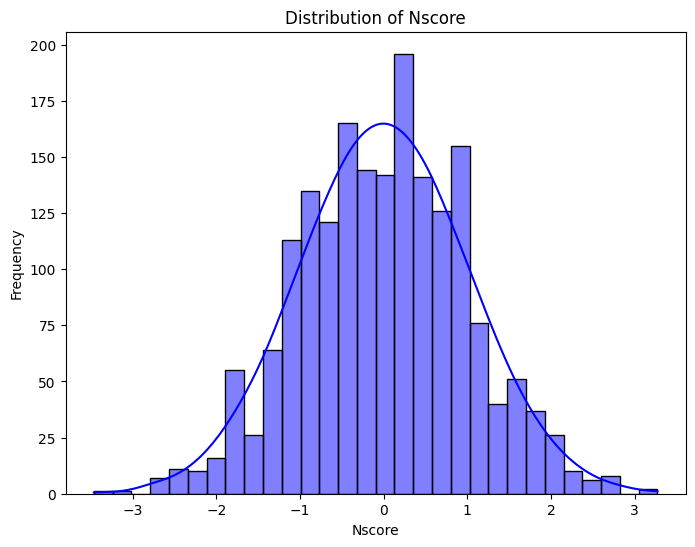

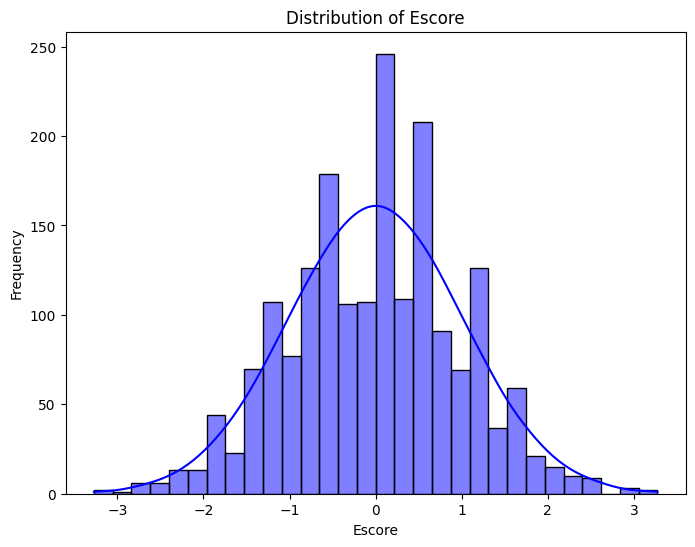

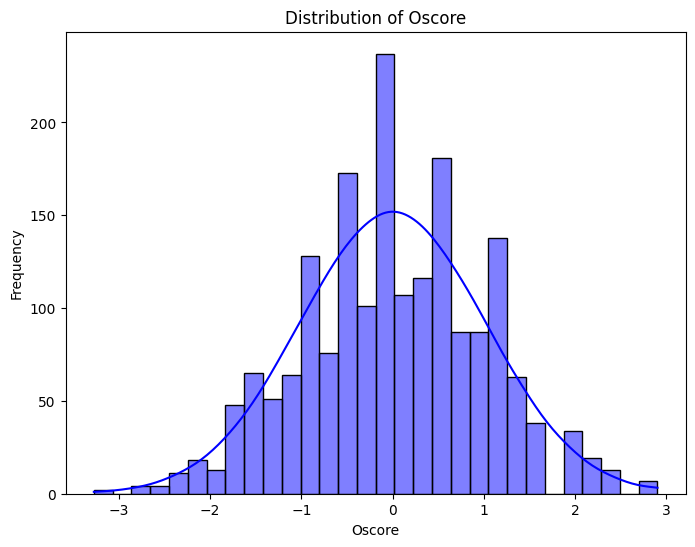

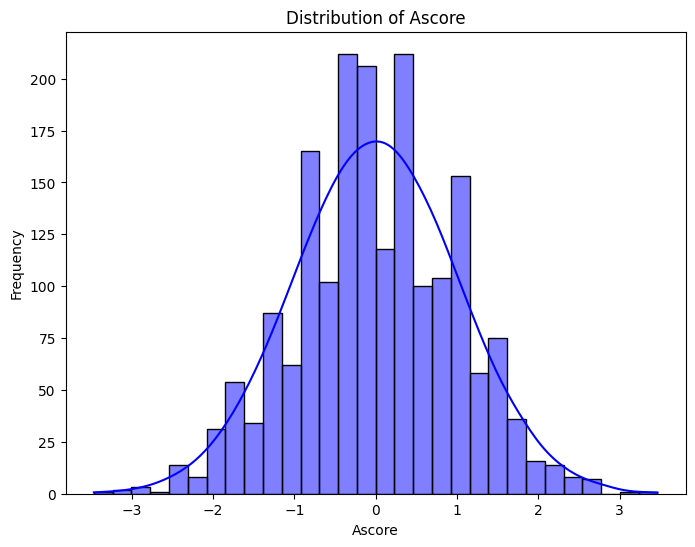

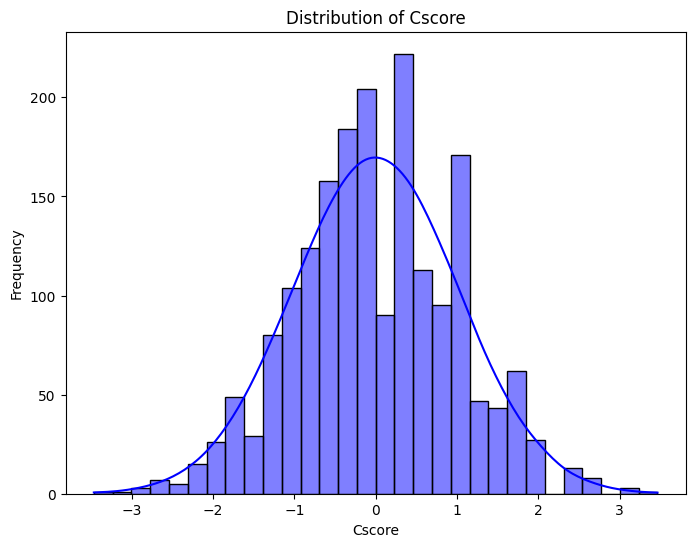

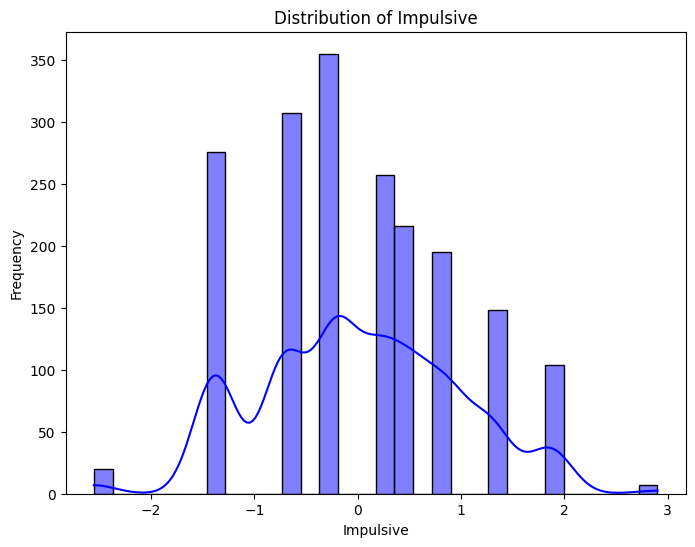

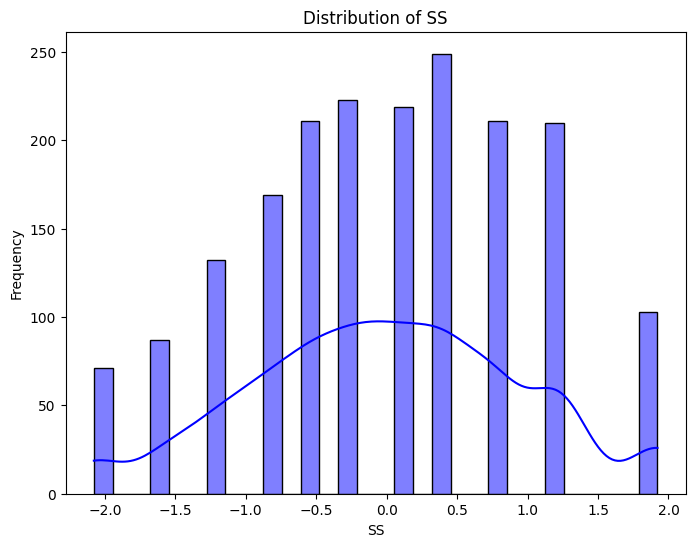

In [8]:
# Visualize the distribution of each psychological score
for score in psychological_scores:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_selected[score], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {score}')
    plt.xlabel(score)
    plt.ylabel('Frequency')
    plt.show()


## Pelatihan dan Evaluasi Model

Kita membagi dataset menjadi set pelatihan dan pengujian serta menerapkan SMOTE untuk menyeimbangkan kelas.



In [9]:
# Prepare features (X) and target (y)
X = df_selected[psychological_scores]
y = df_selected['Cannabis_Binary']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


## Pelatihan Model dan pengaturan hyperparameter

Kita melatih model Random Forest dan Logistic Regression, memilih parameter terbaik untuk Random Forest.


In [10]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Pengaturan Hyperparameter Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [11]:
# Best model from Grid Search
clf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [12]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score (Random Forest):", accuracy)
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred))

Accuracy Score (Random Forest): 0.8624787775891342

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       301
           1       0.86      0.85      0.86       288

    accuracy                           0.86       589
   macro avg       0.86      0.86      0.86       589
weighted avg       0.86      0.86      0.86       589



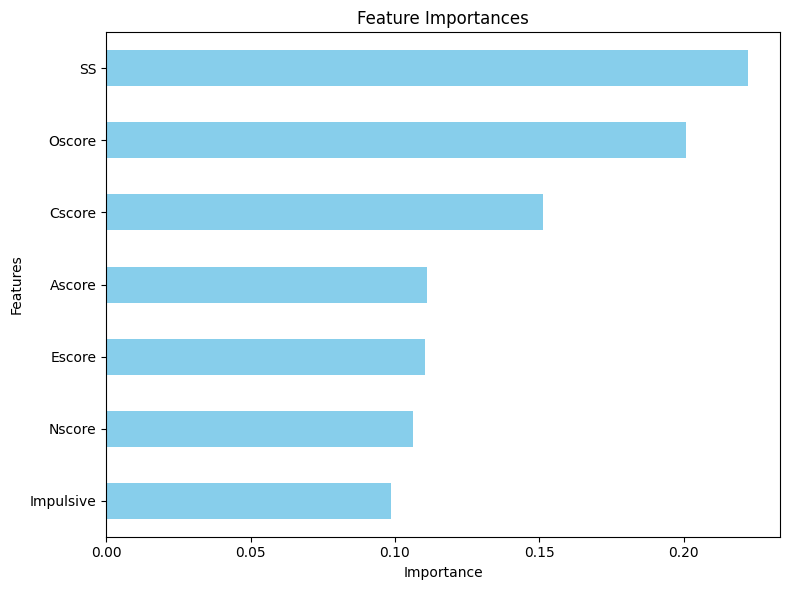

In [14]:
# Feature Importances
feature_importances = pd.Series(clf.feature_importances_, index=psychological_scores)
plt.figure(figsize=(8, 6))
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [15]:
# K-Fold Cross-Validation on the entire dataset
cv_scores = cross_val_score(clf, X_resampled, y_resampled, cv=5)
print("Cross-Validation Scores (Random Forest):", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores (Random Forest): [0.74193548 0.83022071 0.94567063 0.92359932 0.90986395]
Mean CV Score: 0.8702580183176835


In [16]:
# Compare with Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [17]:
# Evaluate Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy Score (Logistic Regression):", accuracy_lr)
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))

Accuracy Score (Logistic Regression): 0.733446519524618

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       301
           1       0.73      0.73      0.73       288

    accuracy                           0.73       589
   macro avg       0.73      0.73      0.73       589
weighted avg       0.73      0.73      0.73       589



In [18]:
# K-Fold Cross-Validation for Logistic Regression
cv_scores_lr = cross_val_score(lr, X_resampled, y_resampled, cv=5)
print("Cross-Validation Scores (Logistic Regression):", cv_scores_lr)
print("Mean CV Score (Logistic Regression):", cv_scores_lr.mean())

Cross-Validation Scores (Logistic Regression): [0.65874363 0.7385399  0.82852292 0.7860781  0.78401361]
Mean CV Score (Logistic Regression): 0.7591796311054132



# Kesimpulan

Jadi, hasil akurasi yang didapatkan dengan menggunakan f1 score dari model random forest adalah 0.87 dan dibandingkan dengan menggunakan logistic regression yang hanya menghasilkan skor yang berupa 0.73 menandakan bahwa model random forest lebih akurat daripada logistic regression tetapi dengan kekurangan yang berupa membutuhkan waktu yang lebih lama untuk dijalankan. Logistic regression lebih efisien untuk dijalankan dengan konsekuensi yaitu penurunan akurasi.

